# Exploring with Matplotlib

In [3]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Use the `titanic_new.csv` from the `data` folder to explore data about the Titanic passengers and make a simple (?) chart.


In [5]:
df = pd.read_csv('data/titanic_new.csv')

# first look at the data
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
# how many rows, columns?
df.shape

(887, 8)

In [8]:
# how many people in each class?
df.Pclass.value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# how many people of each gender?
df.Sex.value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [10]:
# how many people survived or did not?
df.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [11]:
# get all the column names for easy copy/pasting
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [12]:
# NOTES: I want Survived, Pclass, Sex. 
# I would like to to stack up M & F for each Pclass. 
# Y axis will be how many people.
# X axis will be Pclass. Column chart. Stacked bar. Stack will separate M & F.

# make a short list of just columns I want in chart
column_names  = ['Survived', 'Pclass', 'Sex']

# make a new dataframe with only those columns
df2 = df[column_names]

# check a sample to see how df2 looks - sample gets random rows
df2.sample(8)

,Survived,Pclass,Sex
496,0,3,male
97,1,2,female
693,0,3,male
409,0,3,male
480,1,3,female
732,0,3,female
299,1,3,male
16,0,3,male


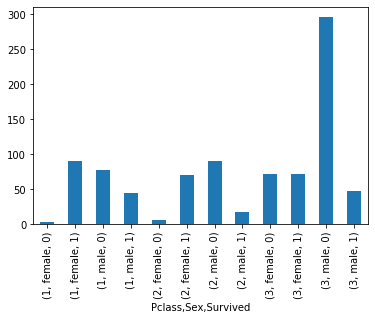

In [13]:
# figured this out from https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart 

df2.groupby(['Pclass','Sex','Survived'])['Survived'].count().plot(kind='bar')


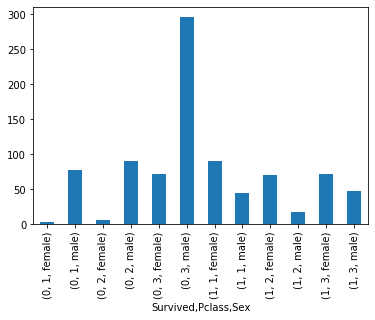

In [15]:
# a different way - note what happened to the order
df2.groupby(['Survived','Pclass','Sex'])['Survived'].count().plot(kind='bar')


Now I have figured out how to show the data I want: how many males, females, in each passenger class (1, 2 or 3), survived or not (1 or 0). But they are all separated into their own columns. I want to make them stack. How?

Note - can you recognize the tall column (3, male, 0)? It is males in 3rd class (3) who did not survive (0).

Next I'm going to make a simple chart showing ONLY survivors. Notice how I get **only the rows that have 1 in the Survived column** — and I store that as **a new dataframe** named `sur`.


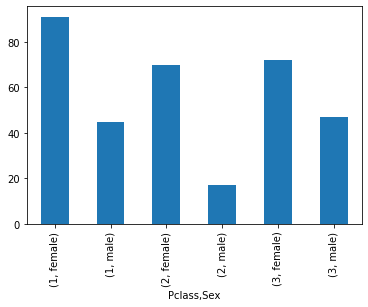

In [16]:
# using df2, make a new dataframe that includes only survivors
sur = df2[df2.Survived == 1]

# using that new dataframe, make a new bar chart
sur.groupby(['Pclass','Sex'])['Survived'].count().plot.bar()

Note how the next chart shows the opposite of the chart above. Above: Survivors only. Below: Dead only. Note the difference in the vertical Y axis.

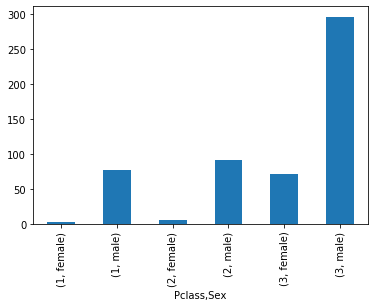

In [17]:
# using df2, make a new dataframe that includes only the dead
died = df2[df2.Survived == 0]

# using that new dataframe, make a new bar chart
died.groupby(['Pclass','Sex'])['Survived'].count().plot.bar()

Great — but still not a stacked bar chart like I wanted.

In [18]:
# back to something I had earlier - but without the chart
df2.groupby(['Pclass','Sex','Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           296
                1            47
Name: Survived, dtype: int64

In [19]:
# what if I save that as all_grps
all_grps = df2.groupby(['Pclass','Sex','Survived'])['Survived'].count()

# can I use the counts from that dataframe? Yes!
# this gives me the count for 3rd class, male, 0 (did not survive)
all_grps[3][2]

296

In [20]:
# this gives me the count for 1st class, female, 1 (survived)
all_grps[1][1]

91

That was interesting, but it did not seem very helpful. Oh, well.

On to a new attempt.

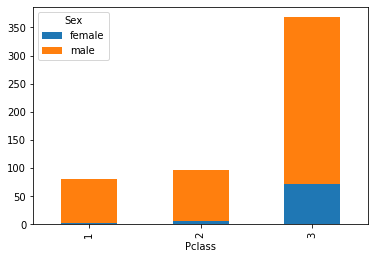

In [21]:
# my new attempt, after more Googling: 
# only people who died, using new dataframe "died" from earlier
died.groupby(['Pclass','Sex'])['Survived'].count().unstack().plot.bar(stacked=True)

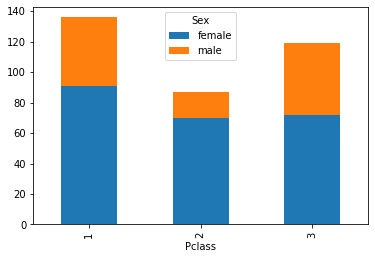

In [22]:
# aha, stacks with male and female! Now try -
# only people who survived, using new dataframe "sur" from earlier
sur.groupby(['Pclass','Sex'])['Survived'].count().unstack().plot.bar(stacked=True)

I would *really* like to get the survivors and the dead into one chart. What I envision is 6 bars, showing stacked male and female, with separate bars for survived and died *in each class.* But I have not quite figured that out.

I hope this gives you a decent idea of how to *explore* the dataset with Pandas, and how to work out getting the chart you desire.
